In [176]:
#importer les packages

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [178]:
#telechargement de dataset

In [179]:
df = pd.read_csv('LoanApprovalPrediction.csv')

In [180]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [181]:
df.shape

(598, 13)

In [182]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [183]:
#pretaitement des données

In [184]:
df['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [185]:
df['Self_Employed'].value_counts()

Self_Employed
No     488
Yes    110
Name: count, dtype: int64

In [186]:
df['Married'].value_counts()

Married
Yes    388
No     210
Name: count, dtype: int64

In [187]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

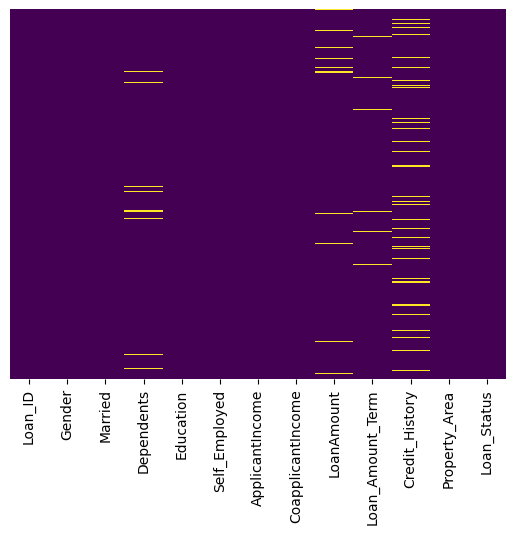

In [188]:
sns.heatmap(df.isnull(), yticklabels=False , cbar=False, cmap='viridis')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [190]:
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)


In [191]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [192]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
df['Married'] = np.where(df['Married'] == 'Yes', 1, 0)
df['Education'] = np.where(df['Education'] == 'Graduate', 1, 0)
df['Self_Employed'] = np.where(df['Self_Employed'] == 'Yes', 1, 0)
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1, 0)
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [193]:
#Creation du dictoinnaire pour le mapping

In [194]:
property_area_mapping = {
    'Urban': 0,
    'Rural': 1,
    'Semiurban': 2
}
#Appliquer le mapping à la colonne 'property_area'
df['Property_Area'] = df['Property_Area'].map(property_area_mapping)

In [195]:
df = df.drop(['Loan_ID'], axis=1)

In [196]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,0,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
594,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1,1
595,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,0,1
596,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,0,1


<Axes: >

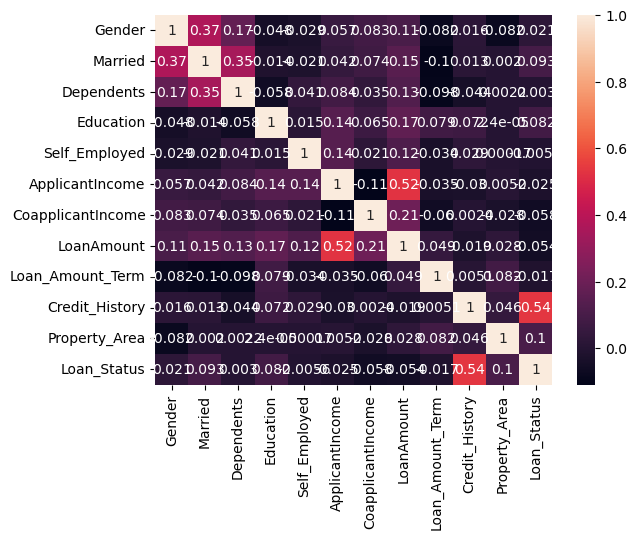

In [197]:
sns.heatmap(df.corr(), annot=True)

In [198]:
#Prétraitement des données:Matrice de corrélation des variables

In [199]:
X = df.drop(['Loan_Status'], axis=1)
Y = df['Loan_Status']
X.shape,Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (358, 11)
X_test: (240, 11)
Y_train: (358,)
Y_test: (240,)


In [200]:
#Sélection du modèle [Regression Logistique]

In [201]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [202]:
# Entrainement du Modèle ou Algorithme

In [203]:
lr_model.fit(X_train, Y_train)

C:\Users\DANH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
#Prediction de la classe

In [205]:
Y_pred_lr = lr_model.predict(X_test)
Y_pred_lr

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [206]:
#Evaluation

In [244]:
print("Accuracy de la Régression logistique:", 100 * accuracy_score(Y_test, Y_pred_lr))
print("MSE de la Régression logistique:", mean_squared_error(Y_test, Y_pred_lr))

Accuracy de la Régression logistique: 81.66666666666667
MSE de la Régression logistique: 0.18333333333333332


[[ 35  38]
 [  6 161]]


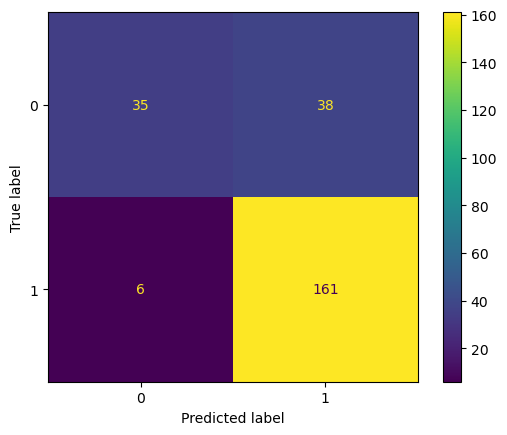

In [256]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(Y_test, Y_pred_lr))
_ = ConfusionMatrixDisplay.from_estimator(lr_model, X_test, Y_test)

In [258]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (358, 11)
X_test: (240, 11)
Y_train: (358,)
Y_test: (240,)


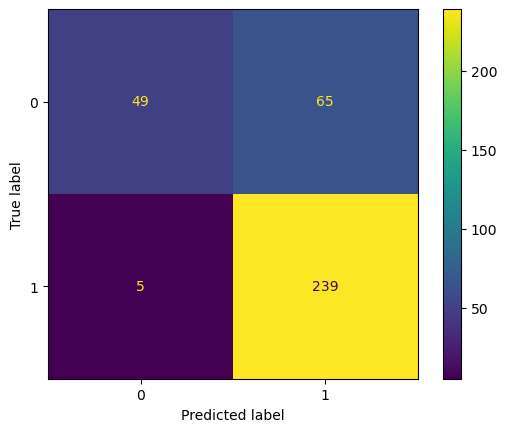

In [266]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_train, Y_train)

In [276]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [288]:
print("Precision Score de la Régression logistique:", precision_score(Y_test, Y_pred_lr))
print("Recall Score de la Régression logistique:", recall_score(Y_test, Y_pred_lr))
print("F1-Score de la régression ligistique:", f1_score(Y_test, Y_pred_lr))

Precision Score de la Régression logistique: 0.8090452261306532
Recall Score de la Régression logistique: 0.9640718562874252
F1-Score de la régression ligistique: 0.8797814207650273


In [295]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
#Entraiment
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [297]:
#Prediction 

In [299]:
Y_pred_knn = knn_model.predict(X_test)
#evaluation
print("Accuracy score of knn model", 100 * metrics.accuracy_score(Y_test, Y_pred_knn))
print("MSE of knn model", mean_squared_error(Y_test, Y_pred_knn))

Accuracy score of knn model 63.74999999999999
MSE of knn model 0.3625


In [301]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7)
#entraiment
rf_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)

In [305]:
#prediction 
Y_pred_rf = rf_model.predict(X_test)
#Evalutation
print("Accuracy score of rf model", 100 * metrics.accuracy_score(Y_test, Y_pred_rf))
print("MSE of rf model", mean_squared_error(Y_test, Y_pred_rf))

Accuracy score of rf model 78.33333333333333
MSE of rf model 0.21666666666666667


In [307]:
#Selection du modele
from sklearn.svm import SVC
svc_model = SVC()
#Entrainemnt 
svc_model.fit(X_train, Y_train)

SVC()

In [309]:
#prediction 
Y_pred_svc = svc_model.predict(X_test)
#Evalutation
print("Accuracy score of svc model", 100 * metrics.accuracy_score(Y_test, Y_pred_svc))
print("MSE of svc model", mean_squared_error(Y_test, Y_pred_svc))

Accuracy score of svc model 69.16666666666667
MSE of svc model 0.30833333333333335


In [311]:
#Selection du modele
from sklearn.linear_model import LinearRegression
lr_model = LogisticRegression()

In [313]:
#Entrainement
lr_model.fit(X_train, Y_train)

C:\Users\DANH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [315]:
#Prediction
Y_pred_lr = lr_model.predict(X_test)

In [317]:
#Evalutation
print("Accuracy de la Regression logistique:", 100 * metrics.accuracy_score(Y_test, Y_pred_lr))
print("MSE de la Regression logistique:", mean_squared_error(Y_test, Y_pred_lr))

Accuracy de la Regression logistique: 81.66666666666667
MSE de la Regression logistique: 0.18333333333333332
